In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

In [3]:
# Read the CSV file
DATA = pd.read_csv('data/EM.csv')
DATA


,Creditscore,Creditscoreindicator,Likelihoodoffailure,CreditlimitGBPGBP,Previouscreditscore,SMEindicator,ReturnonTotalAssets2020,ReturnonTotalAssets2019,ReturnonShareholdersFunds2020,ReturnonShareholdersFunds2019,...,ShareholdersFundsthGBP2020,ShareholdersFundsthGBP2019,TaxationthGBP2020,TaxationthGBP2019,Grossmargin2020,Grossmargin2019,Currentratiox2020,Currentratiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019
0,92,Secure,0.9,50000000.0,95.0,No,NaN,5.614489,NaN,10.284360,...,NaN,2110000.000,NaN,-50000.0,NaN,37.888106,NaN,1.224782,NaN,NaN
1,92,Secure,0.9,50000000.0,99.0,No,-0.130484,2.832746,-0.283735,7.000426,...,2713800.000,2582700.000,-14200.0,-58000.0,29.740966,29.250830,1.474780,1.300454,85.144166,67.969367
2,95,Secure,0.9,16574000.0,99.0,No,NaN,3.817802,NaN,18.074145,...,NaN,397247.000,NaN,-19589.0,NaN,13.304340,NaN,0.892335,NaN,26.779674
3,89,Secure,0.9,5380000.0,92.0,No,NaN,-5.702719,NaN,-67.554766,...,NaN,168900.000,NaN,-3300.0,NaN,10.490224,NaN,0.921290,NaN,9.219936
4,99,Secure,0.9,50000000.0,99.0,No,21.144665,26.910621,169.535674,130.534489,...,441500.000,553800.000,-138300.0,-132500.0,38.453425,35.374574,2.058749,1.826697,14.249290,25.969519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8171,31,Caution,10.8,846.0,38.0,Yes,NaN,51.344614,NaN,92.855191,...,31.868,36.600,NaN,NaN,NaN,NaN,1.778772,1.566767,30.805815,NaN
8172,19,High Risk,10.6,NaN,21.0,Unconfirmed,NaN,-73.025732,NaN,NaN,...,NaN,-0.823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8173,21,Caution,10.6,NaN,29.0,Yes,NaN,94.231524,NaN,NaN,...,92.061,NaN,NaN,NaN,NaN,66.903454,0.962697,1.445911,NaN,NaN
8174,21,Caution,10.6,NaN,21.0,Yes,NaN,-100.000000,NaN,NaN,...,-13.702,NaN,NaN,NaN,NaN,16.189985,NaN,1.000000,NaN,NaN


In [4]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8176 entries, 0 to 8175
Data columns (total 72 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Creditscore                      8176 non-null   int64  
 1   Creditscoreindicator             8176 non-null   object 
 2   Likelihoodoffailure              8107 non-null   float64
 3   CreditlimitGBPGBP                6771 non-null   float64
 4   Previouscreditscore              7740 non-null   float64
 5   SMEindicator                     8176 non-null   object 
 6   ReturnonTotalAssets2020          2981 non-null   float64
 7   ReturnonTotalAssets2019          6773 non-null   float64
 8   ReturnonShareholdersFunds2020    2443 non-null   float64
 9   ReturnonShareholdersFunds2019    5456 non-null   float64
 10  ReturnonCapitalEmployed2020      2913 non-null   float64
 11  ReturnonCapitalEmployed2019      6601 non-null   float64
 12  TurnoverthGBP2020   

In [5]:
sme_categories = DATA['SMEindicator'].unique()
credit_score_categories = DATA['Creditscoreindicator'].unique()
print(sme_categories)
print(credit_score_categories)

['No' 'Unconfirmed' 'Yes']
['Secure' 'Normal' 'Caution' 'Stable' 'High Risk']


## Exploratory Data Analysis (EDA)

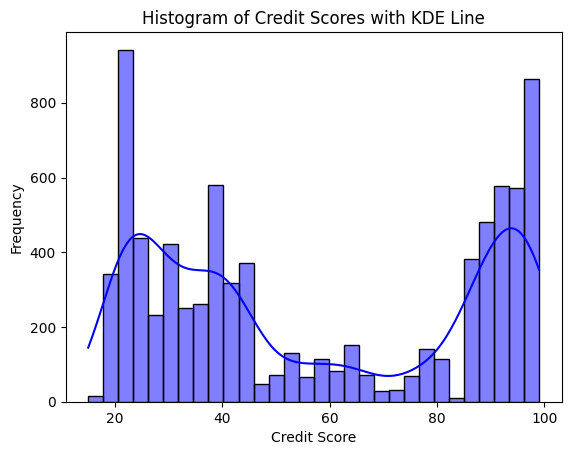

In [6]:
# Plot histogram with KDE line
sns.histplot(data=DATA, x='Creditscore', kde=True, bins=30, color='blue')

plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Histogram of Credit Scores with KDE Line')

# Show the plot
plt.show()


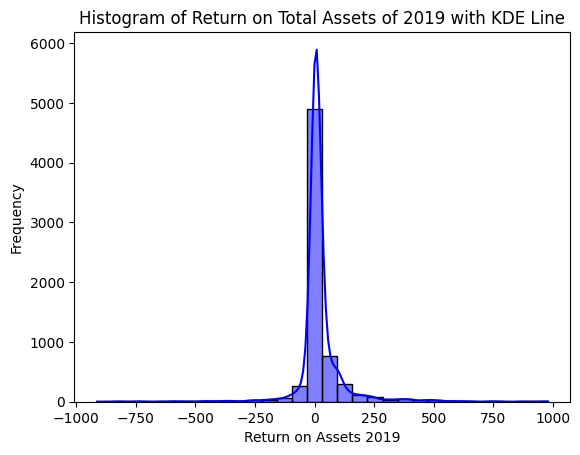

In [10]:
# Plot histogram with KDE line
sns.histplot(data=DATA, x='ReturnonTotalAssets2019', kde=True, bins=30, color='blue')

plt.xlabel('Return on Assets 2019')
plt.ylabel('Frequency')
plt.title('Histogram of Return on Total Assets of 2019 with KDE Line')

# Show the plot
plt.show()


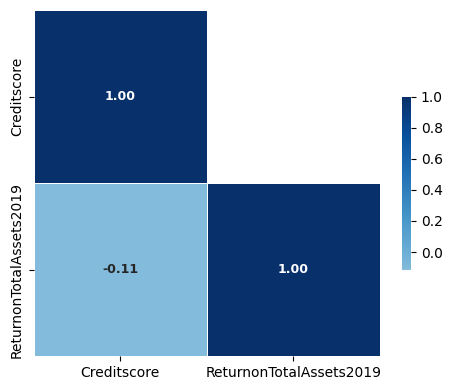

In [13]:
## CORRELATION MATRIX

corr_matrix = DATA[['Creditscore', 'ReturnonTotalAssets2019']].corr()

# Create a mask to hide the upper triangle of the correlation matrix, including the diagonal
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Modify the mask to keep the diagonal
mask[np.diag_indices_from(mask)] = False

# Set up the matplotlib figure
plt.figure(figsize=(5, 4))

# Draw the heatmap with the mask and custom colormap
sns.heatmap(corr_matrix, cmap='Blues', 
            mask=mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f",
            annot_kws={"size": 9, "weight": "bold"})

# Adjust the plot as needed
plt.tight_layout()
plt.show()

## Data Preprocessing

In [ ]:
onehot_encoder = OneHotEncoder(sparse_output=False)
sme_encoded = onehot_encoder.fit_transform(DATA[['SMEindicator']])

# Encoders initiailsation
credit_order = [['High Risk', 'Caution', 'Normal', 'Stable', 'Secure']]
ordinal_encoder = OrdinalEncoder(categories=credit_order)
credit_encoded = ordinal_encoder.fit_transform(DATA[['Creditscoreindicator']])

# Add the encoded columns to the DataFrame
PROCESSED_DATA = DATA.select_dtypes(exclude='object')
PROCESSED_DATA[onehot_encoder.get_feature_names_out(['SMEindicator'])] = sme_encoded
PROCESSED_DATA['Creditscoreindicator'] = credit_encoded

PROCESSED_DATA


,Creditscore,Likelihoodoffailure,CreditlimitGBPGBP,Previouscreditscore,ReturnonTotalAssets2020,ReturnonTotalAssets2019,ReturnonShareholdersFunds2020,ReturnonShareholdersFunds2019,ReturnonCapitalEmployed2020,ReturnonCapitalEmployed2019,...,Grossmargin2020,Grossmargin2019,Currentratiox2020,Currentratiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019,SMEindicator_No,SMEindicator_Unconfirmed,SMEindicator_Yes,Creditscoreindicator
0,92,0.9,50000000.0,95.0,NaN,5.614489,NaN,10.284360,NaN,8.326938,...,NaN,37.888106,NaN,1.224782,NaN,NaN,1.0,0.0,0.0,4.0
1,92,0.9,50000000.0,99.0,-0.130484,2.832746,-0.283735,7.000426,-0.175859,4.070147,...,29.740966,29.250830,1.474780,1.300454,85.144166,67.969367,1.0,0.0,0.0,4.0
2,95,0.9,16574000.0,99.0,NaN,3.817802,NaN,18.074145,NaN,15.152711,...,NaN,13.304340,NaN,0.892335,NaN,26.779674,1.0,0.0,0.0,4.0
3,89,0.9,5380000.0,92.0,NaN,-5.702719,NaN,-67.554766,NaN,-15.251972,...,NaN,10.490224,NaN,0.921290,NaN,9.219936,1.0,0.0,0.0,4.0
4,99,0.9,50000000.0,99.0,21.144665,26.910621,169.535674,130.534489,28.898498,45.933410,...,38.453425,35.374574,2.058749,1.826697,14.249290,25.969519,1.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8171,31,10.8,846.0,38.0,NaN,51.344614,NaN,92.855191,NaN,82.954989,...,NaN,NaN,1.778772,1.566767,30.805815,NaN,0.0,0.0,1.0,1.0
8172,19,10.6,NaN,21.0,NaN,-73.025732,NaN,NaN,NaN,-73.025732,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
8173,21,10.6,NaN,29.0,NaN,94.231524,NaN,NaN,NaN,154.809464,...,NaN,66.903454,0.962697,1.445911,NaN,NaN,0.0,0.0,1.0,1.0
8174,21,10.6,NaN,21.0,NaN,-100.000000,NaN,NaN,NaN,NaN,...,NaN,16.189985,NaN,1.000000,NaN,NaN,0.0,0.0,1.0,1.0


In [ ]:
mean_cerdit_score = PROCESSED_DATA['Creditscore'].mean()
PROCESSED_DATA['CreditLevel'] = np.where(PROCESSED_DATA['Creditscore'] > mean_cerdit_score, 1, 0)
PROCESSED_DATA = PROCESSED_DATA.drop(columns=['Creditscore'])
PROCESSED_DATA['CreditLevel']

0       1
1       1
2       1
3       1
4       1
       ..
8171    0
8172    0
8173    0
8174    0
8175    1
Name: CreditLevel, Length: 8176, dtype: int64

In [ ]:
PROCESSED_DATA.fillna(PROCESSED_DATA.mean(), inplace=True)
PROCESSED_DATA

,Likelihoodoffailure,CreditlimitGBPGBP,Previouscreditscore,ReturnonTotalAssets2020,ReturnonTotalAssets2019,ReturnonShareholdersFunds2020,ReturnonShareholdersFunds2019,ReturnonCapitalEmployed2020,ReturnonCapitalEmployed2019,TurnoverthGBP2020,...,Grossmargin2019,Currentratiox2020,Currentratiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019,SMEindicator_No,SMEindicator_Unconfirmed,SMEindicator_Yes,Creditscoreindicator,CreditLevel
0,0.9,5.000000e+07,95.0,27.903380,5.614489,65.895390,10.284360,51.135009,8.326938,2.720014e+04,...,37.888106,4.137871,1.224782,35.770585,36.916356,1.0,0.0,0.0,4.0,1
1,0.9,5.000000e+07,99.0,-0.130484,2.832746,-0.283735,7.000426,-0.175859,4.070147,6.157500e+06,...,29.250830,1.474780,1.300454,85.144166,67.969367,1.0,0.0,0.0,4.0,1
2,0.9,1.657400e+07,99.0,27.903380,3.817802,65.895390,18.074145,51.135009,15.152711,2.720014e+04,...,13.304340,4.137871,0.892335,35.770585,26.779674,1.0,0.0,0.0,4.0,1
3,0.9,5.380000e+06,92.0,27.903380,-5.702719,65.895390,-67.554766,51.135009,-15.251972,2.720014e+04,...,10.490224,4.137871,0.921290,35.770585,9.219936,1.0,0.0,0.0,4.0,1
4,0.9,5.000000e+07,99.0,21.144665,26.910621,169.535674,130.534489,28.898498,45.933410,4.266200e+06,...,35.374574,2.058749,1.826697,14.249290,25.969519,1.0,0.0,0.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8171,10.8,8.460000e+02,38.0,27.903380,51.344614,65.895390,92.855191,51.135009,82.954989,2.720014e+04,...,40.828643,1.778772,1.566767,30.805815,36.916356,0.0,0.0,1.0,1.0,0
8172,10.6,5.292997e+05,21.0,27.903380,-73.025732,65.895390,51.214527,51.135009,-73.025732,2.720014e+04,...,40.828643,4.137871,3.331513,35.770585,36.916356,0.0,1.0,0.0,0.0,0
8173,10.6,5.292997e+05,29.0,27.903380,94.231524,65.895390,51.214527,51.135009,154.809464,2.720014e+04,...,66.903454,0.962697,1.445911,35.770585,36.916356,0.0,0.0,1.0,1.0,0
8174,10.6,5.292997e+05,21.0,27.903380,-100.000000,65.895390,51.214527,51.135009,38.020029,2.720014e+04,...,16.189985,4.137871,1.000000,35.770585,36.916356,0.0,0.0,1.0,1.0,0


In [ ]:
X = PROCESSED_DATA.iloc[:, :-1]
Y = PROCESSED_DATA.iloc[:, -1]

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.3, random_state=123)
X_TRAIN

,Likelihoodoffailure,CreditlimitGBPGBP,Previouscreditscore,ReturnonTotalAssets2020,ReturnonTotalAssets2019,ReturnonShareholdersFunds2020,ReturnonShareholdersFunds2019,ReturnonCapitalEmployed2020,ReturnonCapitalEmployed2019,TurnoverthGBP2020,...,Grossmargin2020,Grossmargin2019,Currentratiox2020,Currentratiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019,SMEindicator_No,SMEindicator_Unconfirmed,SMEindicator_Yes,Creditscoreindicator
4728,4.5,793.0,54.0,23.330358,118.857559,91.200993,460.774566,91.200993,441.793680,132.177000,...,44.991604,40.828643,1.343747,1.368053,34.374746,34.762108,0.0,0.0,1.0,2.0
3021,1.8,53827.0,66.0,14.090033,8.508904,30.987402,26.420364,23.666659,16.325723,4032.140000,...,37.125819,36.852699,1.019031,1.087470,83.385953,47.505363,0.0,0.0,1.0,2.0
6980,4.6,500.0,49.0,27.903380,-6.097286,65.895390,-34.060174,51.135009,-34.060174,27200.140834,...,44.991604,100.000000,4.137871,0.750200,35.770585,21.804924,0.0,0.0,1.0,2.0
7096,10.8,500.0,38.0,-51.118336,90.530925,65.895390,51.214527,-51.118336,93.552036,2.587000,...,44.991604,100.000000,4.137871,30.966102,35.770585,36.916356,0.0,0.0,1.0,1.0
4226,2.2,13451.0,78.0,2.416358,1.918568,47.143845,60.474444,7.518911,5.224520,380.000000,...,100.000000,100.000000,0.009302,0.007617,5.402401,3.276474,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,0.9,128501.0,99.0,1.880379,-0.039101,3.307531,-0.082837,3.565148,-0.082837,545.884000,...,100.000000,100.000000,1.959644,1.777422,35.770585,89.402448,0.0,0.0,1.0,4.0
1346,0.9,207190.0,92.0,13.631448,15.007662,21.831049,25.797969,21.831049,25.797969,21225.508000,...,8.427812,7.863991,2.392723,2.172762,35.770585,36.916356,0.0,0.0,1.0,4.0
3454,0.9,28664.0,92.0,27.903380,94.720497,65.895390,575.471698,51.135009,435.714286,27200.140834,...,44.991604,74.751861,4.137871,0.757937,35.770585,19.702602,0.0,0.0,1.0,4.0
7533,4.5,500.0,34.0,27.903380,-14.226232,65.895390,-47.018349,51.135009,-37.511436,27200.140834,...,44.991604,40.828643,1.524845,0.998323,63.673155,43.383085,0.0,0.0,1.0,2.0


In [ ]:
_columns_to_scale = PROCESSED_DATA.columns[:-5]
_columns_not_to_scale = PROCESSED_DATA.columns[-5:-1]
print(_columns_to_scale)
print(_columns_not_to_scale)

scaler = StandardScaler()

# X_TRAIN = scaler.fit_transform(X_TRAIN)
# X_TEST = scaler.fit_transform(X_TEST)

X_TRAIN[_columns_to_scale] = scaler.fit_transform(X_TRAIN[_columns_to_scale])
X_TEST[_columns_to_scale] = scaler.transform(X_TEST[_columns_to_scale])

X_TRAIN

Index(['Likelihoodoffailure', 'CreditlimitGBPGBP', 'Previouscreditscore',
       'ReturnonTotalAssets2020', 'ReturnonTotalAssets2019',
       'ReturnonShareholdersFunds2020', 'ReturnonShareholdersFunds2019',
       'ReturnonCapitalEmployed2020', 'ReturnonCapitalEmployed2019',
       'TurnoverthGBP2020', 'TurnoverthGBP2019', 'NetAssetsTurnoverx2020',
       'NetAssetsTurnoverx2019', 'TradeCreditorsthGBP2020',
       'TradeCreditorsthGBP2019', 'StockTurnoverx2020', 'StockTurnoverx2019',
       'StockWIPthGBP2020', 'StockWIPthGBP2019', 'NetCurrentAssets2020',
       'NetCurrentAssets2019', 'FixedAssetsthGBP2020', 'FixedAssetsthGBP2019',
       'IntangibleAssetsthGBP2020', 'IntangibleAssetsthGBP2019',
       'TotalAssetsthGBP2020', 'TotalAssetsthGBP2019',
       'OrdinarySharesthGBP2020', 'OrdinarySharesthGBP2019',
       'RetainedProfitLossGBP2020', 'RetainedProfitLossthGBP2019',
       'CurrentAssetsthGBP2020', 'CurrentAssetsthGBP2019',
       'CurrentLiabilitiesthGBP2020', 'CurrentLiabi

,Likelihoodoffailure,CreditlimitGBPGBP,Previouscreditscore,ReturnonTotalAssets2020,ReturnonTotalAssets2019,ReturnonShareholdersFunds2020,ReturnonShareholdersFunds2019,ReturnonCapitalEmployed2020,ReturnonCapitalEmployed2019,TurnoverthGBP2020,...,Grossmargin2020,Grossmargin2019,Currentratiox2020,Currentratiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019,SMEindicator_No,SMEindicator_Unconfirmed,SMEindicator_Yes,Creditscoreindicator
4728,-0.161297,-0.192724,-0.229058,-0.067465,1.001139,0.274816,3.529980,0.406330,3.226375,-0.201465,...,0.013981,0.005488,-0.476483,-0.281550,-0.120038,-0.130135,0.0,0.0,1.0,2.0
3021,-0.779541,-0.173676,0.186482,-0.195460,-0.142071,-0.404885,-0.205203,-0.294982,-0.169165,-0.171508,...,-0.505850,-0.167079,-0.532814,-0.320763,4.026003,0.599490,0.0,0.0,1.0,2.0
6980,-0.138399,-0.192829,-0.402200,-0.004120,-0.293391,-0.010838,-0.725299,-0.009736,-0.571280,0.006452,...,0.013981,2.573703,0.008230,-0.367899,-0.001959,-0.872008,0.0,0.0,1.0,2.0
7096,1.281273,-0.192829,-0.783111,-1.098715,0.707675,-0.010838,0.008012,-1.071590,0.447157,-0.202460,...,0.013981,2.573703,0.008230,3.854984,-0.001959,-0.006792,0.0,0.0,1.0,1.0
4226,-0.687949,-0.188178,0.602021,-0.357162,-0.210347,-0.222508,0.087641,-0.462669,-0.257760,-0.199561,...,3.649353,2.573703,-0.707978,-0.471680,-2.570917,-1.932868,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,-0.985623,-0.146855,1.329216,-0.364586,-0.230628,-0.717340,-0.433115,-0.503727,-0.300117,-0.198287,...,3.649353,2.573703,-0.369640,-0.224338,-0.001959,2.998338,0.0,0.0,1.0,4.0
1346,-0.985623,-0.118592,1.086818,-0.201812,-0.074744,-0.508244,-0.210555,-0.314044,-0.093570,-0.039441,...,-2.402432,-1.425276,-0.294511,-0.169086,-0.001959,-0.006792,0.0,0.0,1.0,4.0
3454,-0.985623,-0.182714,1.086818,-0.004120,0.751079,-0.010838,4.516306,-0.009736,3.177857,0.006452,...,0.013981,1.477858,0.008230,-0.366818,-0.001959,-0.992378,0.0,0.0,1.0,4.0
7533,-0.161297,-0.192829,-0.921624,-0.004120,-0.377606,-0.010838,-0.836732,-0.009736,-0.598824,0.006452,...,0.013981,0.005488,-0.445067,-0.333222,2.358424,0.363466,0.0,0.0,1.0,2.0


## ExtraTrees Classifier

In [ ]:
EXTRATREE_MODEL = ExtraTreesClassifier(n_estimators=100, random_state=123)
EXTRATREE_MODEL.fit(X_TRAIN, Y_TRAIN)
EXTRATREE_PREDICTIONS = EXTRATREE_MODEL.predict(X_TEST)
print(classification_report(Y_TEST, EXTRATREE_PREDICTIONS))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.99      0.99      0.99      1097

    accuracy                           0.99      2453
   macro avg       0.99      0.99      0.99      2453
weighted avg       0.99      0.99      0.99      2453



In [ ]:
extratree_accuracy = cross_val_score(EXTRATREE_MODEL, X_TRAIN, Y_TRAIN, cv=10, scoring='accuracy')
print(f'ExtraTree Accuracy: {extratree_accuracy.mean().round(4) * 100}%')
print(f'ExtraTree Standard Deviation: {extratree_accuracy.std().round(4) * 100}%')

ExtraTree Accuracy: 99.32%
ExtraTree Standard Deviation: 0.27999999999999997%


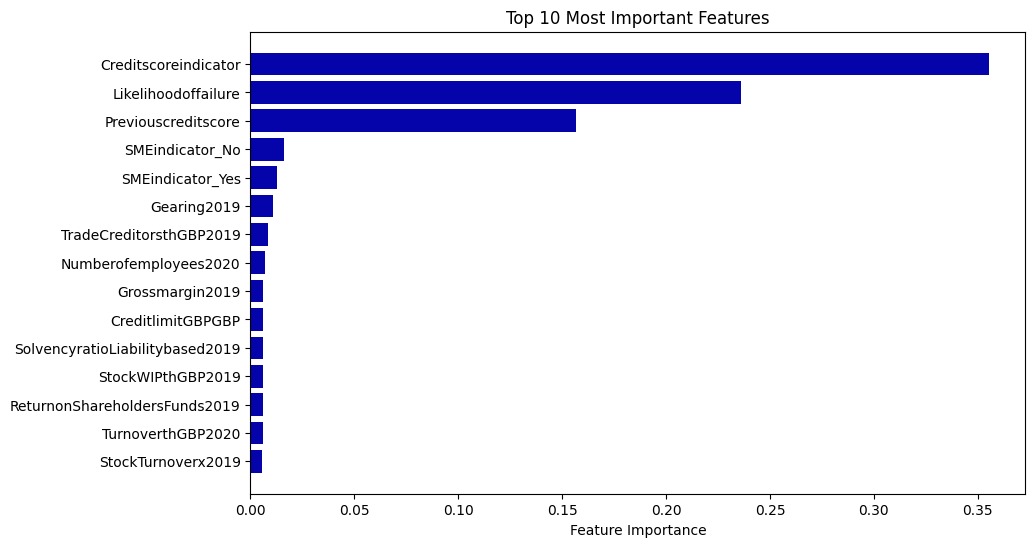

In [ ]:
# Get feature importances from the ExtraTreesClassifier model
importances = EXTRATREE_MODEL.feature_importances_

# Get the indices of the top 10 most important features
top_indices = importances.argsort()[-15:]

# Get the names of the top 10 most important features
top_features = PROCESSED_DATA.columns[top_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), importances[top_indices], align='center', color='#0504aa')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features')
plt.show()

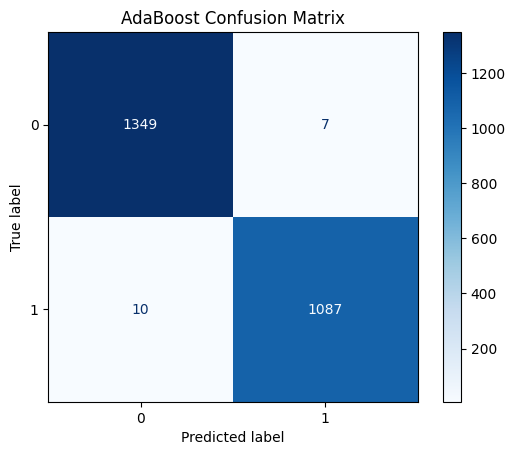

In [ ]:
# Confusion Matrix
matrix = ConfusionMatrixDisplay(confusion_matrix(Y_TEST, EXTRATREE_PREDICTIONS))
plt.show(matrix.plot(cmap='Blues'), matrix.ax_.set_title('AdaBoost Confusion Matrix'))

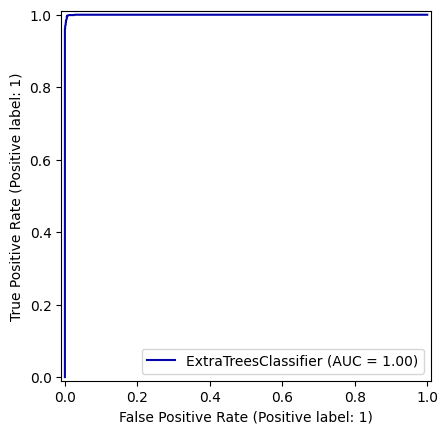

In [ ]:
# ROC Curve
roc = RocCurveDisplay.from_estimator(EXTRATREE_MODEL, X_TEST, Y_TEST, color='#0504aa')

## K-Nearest-Neighbors

In [ ]:
KNN_MODEL = KNeighborsClassifier(n_neighbors=5)
KNN_MODEL.fit(X_TRAIN, Y_TRAIN)
KNN_PREDICTIONS = KNN_MODEL.predict(X_TEST)
print(classification_report(Y_TEST, KNN_PREDICTIONS))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.97      0.95      0.96      1097

    accuracy                           0.96      2453
   macro avg       0.97      0.96      0.96      2453
weighted avg       0.96      0.96      0.96      2453



In [ ]:
knn_accuracy = cross_val_score(KNN_MODEL, X_TRAIN, Y_TRAIN, cv=10, scoring='accuracy')
print(f'KNN Accuracy: {knn_accuracy.mean().round(4) * 100}%')
print(f'KNN Standard Deviation: {knn_accuracy.std().round(4) * 100}%')

KNN Accuracy: 96.21%
KNN Standard Deviation: 0.8699999999999999%


## Support Vector Classifier

In [ ]:
SVC_MODEL = SVC(kernel='linear')
SVC_MODEL.fit(X_TRAIN, Y_TRAIN)
SVC_PREDICTIONS = SVC_MODEL.predict(X_TEST)
print(classification_report(Y_TEST, SVC_PREDICTIONS))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.99      0.99      0.99      1097

    accuracy                           0.99      2453
   macro avg       0.99      0.99      0.99      2453
weighted avg       0.99      0.99      0.99      2453



In [ ]:
svc_accuracy = cross_val_score(SVC_MODEL, X_TRAIN, Y_TRAIN, cv=10, scoring='accuracy')
print(f'SVC Accuracy: {svc_accuracy.mean().round(4) * 100}%')
print(f'SVC Standard Deviation: {svc_accuracy.std().round(4) * 100}%')

SVC Accuracy: 99.21%
SVC Standard Deviation: 0.38%


## ADA Boost Classifier

In [ ]:
ADA_MODEL = AdaBoostClassifier(n_estimators=100, random_state=123)
ADA_MODEL.fit(X_TRAIN, Y_TRAIN)
ADA_PREDICTIONS = ADA_MODEL.predict(X_TEST)
print(classification_report(Y_TEST, ADA_PREDICTIONS))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.99      0.99      0.99      1097

    accuracy                           0.99      2453
   macro avg       0.99      0.99      0.99      2453
weighted avg       0.99      0.99      0.99      2453



In [ ]:
ada_accuracy = cross_val_score(ADA_MODEL, X_TRAIN, Y_TRAIN, cv=10, scoring='accuracy')
print(f'ADA Accuracy: {ada_accuracy.mean().round(4) * 100}%')
print(f'ADA Standard Deviation: {ada_accuracy.std().round(4) * 100}%')

ADA Accuracy: 99.21%
ADA Standard Deviation: 0.27999999999999997%


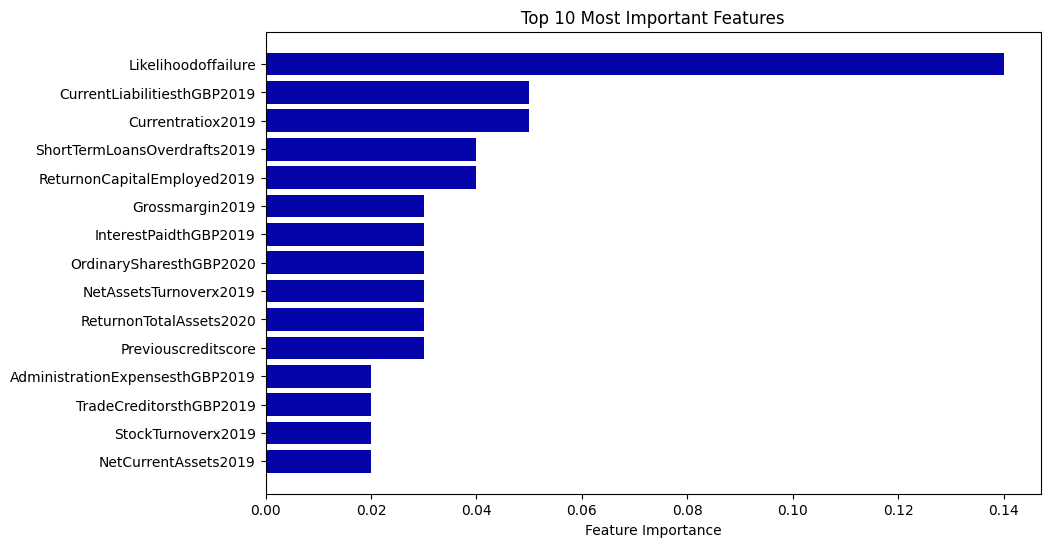

In [ ]:
# Get feature importances from the ExtraTreesClassifier model
importances = ADA_MODEL.feature_importances_

# Get the indices of the top 10 most important features
top_indices = importances.argsort()[-15:]

# Get the names of the top 10 most important features
top_features = PROCESSED_DATA.columns[top_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), importances[top_indices], align='center', color='#0504aa')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features')
plt.show()


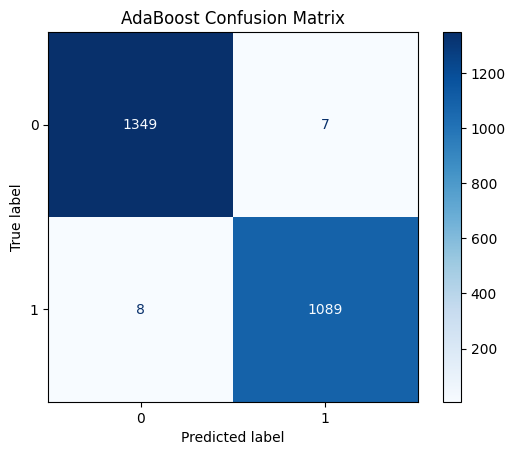

In [ ]:
# Confusion Matrix
matrix = ConfusionMatrixDisplay(confusion_matrix(Y_TEST, ADA_PREDICTIONS))
plt.show(matrix.plot(cmap='Blues'), matrix.ax_.set_title('AdaBoost Confusion Matrix'))

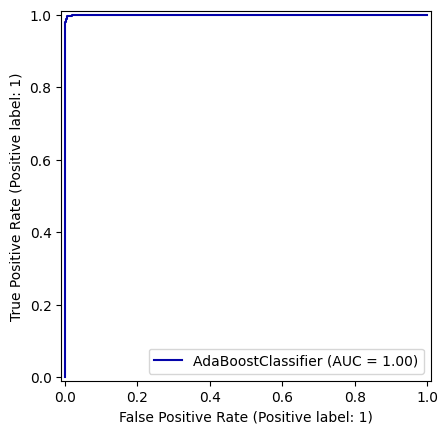

In [ ]:
# ROC Curve
roc = RocCurveDisplay.from_estimator(ADA_MODEL, X_TEST, Y_TEST, color='#0504aa')